<a href="https://www.kaggle.com/code/antongalysh/practice9?scriptVersionId=199922019" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.drop(columns=['PID', 'Order'], inplace=True)
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [4]:
df.shape

(2930, 80)

In [5]:
y = df['SalePrice']
X = df.drop(columns='SalePrice')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [7]:
X_train.shape, X_test.shape

((2344, 79), (586, 79))

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [9]:
num_columns = X.select_dtypes(include='number').columns
cat_columns = X.select_dtypes(include='object').columns

num_transformer = Pipeline(
    steps=[('impute', SimpleImputer(strategy='median'))]
)

cat_transformer = Pipeline(
    steps=[('impute', SimpleImputer(strategy='most_frequent')),
           ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
                                     unknown_value=-1
                                     ))
          ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full...
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])

In [10]:
preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep

,num__MS SubClass,num__Lot Frontage,num__Lot Area,num__Overall Qual,num__Overall Cond,num__Year Built,num__Year Remod/Add,num__Mas Vnr Area,num__BsmtFin SF 1,num__BsmtFin SF 2,...,cat__Garage Type,cat__Garage Finish,cat__Garage Qual,cat__Garage Cond,cat__Paved Drive,cat__Pool QC,cat__Fence,cat__Misc Feature,cat__Sale Type,cat__Sale Condition
381,20.0,80.0,10400.0,7.0,5.0,1976.0,1976.0,189.0,0.0,0.0,...,1.0,1.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,3.0
834,60.0,68.0,28698.0,5.0,5.0,1967.0,1967.0,0.0,249.0,764.0,...,1.0,0.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,0.0
1898,90.0,70.0,9842.0,4.0,5.0,1962.0,1962.0,0.0,0.0,0.0,...,4.0,2.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
678,90.0,60.0,7200.0,4.0,5.0,1949.0,1950.0,0.0,0.0,0.0,...,5.0,2.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
700,190.0,63.0,7627.0,4.0,6.0,1920.0,1950.0,0.0,0.0,0.0,...,1.0,2.0,4.0,4.0,0.0,0.0,2.0,3.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,190.0,195.0,41600.0,5.0,5.0,1969.0,1990.0,0.0,1047.0,0.0,...,0.0,2.0,4.0,4.0,0.0,0.0,2.0,3.0,9.0,4.0
1095,60.0,68.0,7750.0,7.0,5.0,2002.0,2002.0,0.0,0.0,0.0,...,1.0,0.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
1130,60.0,64.0,8791.0,6.0,5.0,2003.0,2003.0,0.0,503.0,0.0,...,1.0,1.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
1294,50.0,81.0,7308.0,5.0,5.0,1920.0,1950.0,0.0,360.0,0.0,...,5.0,2.0,1.0,1.0,0.0,0.0,2.0,3.0,9.0,4.0


In [11]:
X_train.nunique()

MS SubClass         16
MS Zoning            7
Lot Frontage       120
Lot Area          1634
Street               2
                  ... 
Misc Val            35
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
Length: 79, dtype: int64

In [12]:
import lightgbm as lgb

In [13]:
model = lgb.LGBMRegressor(objective='mae',
                          n_estimators=500)

In [14]:
model.fit(X_train_prep, y_train,
          eval_set=[(X_test_prep, y_test), (X_train_prep, y_train)],
          eval_names = ['test', 'train'],
          eval_metric='mse')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3654
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 73
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 160000.000000


LGBMRegressor(n_estimators=500, objective='mae')

In [15]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [16]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train_prep))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test_prep))

all_metrics

,train,test
MAE,5717.09,14063.28
RMSE,16560.24,25722.25
R2,0.95,0.92


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

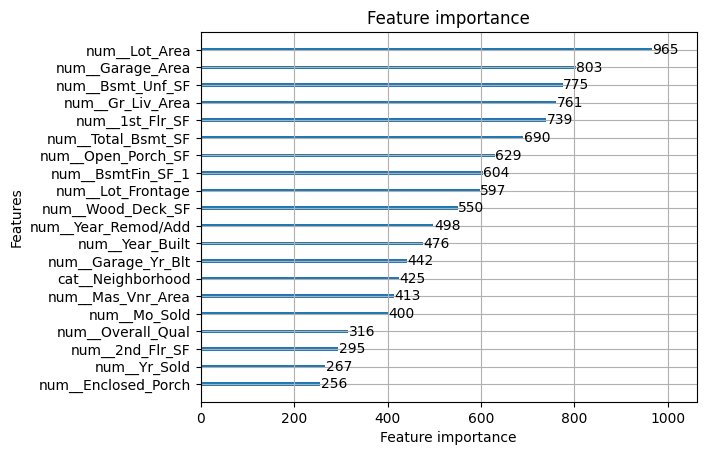

In [17]:
lgb.plot_importance(model, max_num_features=20)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

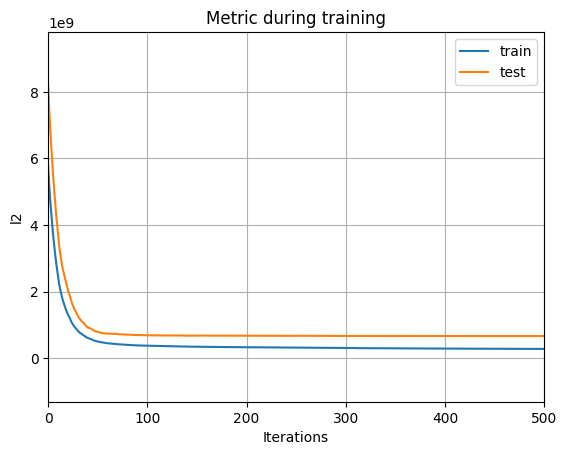

In [18]:
lgb.plot_metric(model,
                metric='l2')